In [1]:
from datetime import datetime
import re
from urllib.request import urlopen

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import pandas as pd

In [2]:
populations_url = 'https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population'
mortalities_url = 'https://en.wikipedia.org/wiki/List_of_sovereign_states_and_dependent_territories_by_mortality_rate'
coronavirus_url = 'https://en.wikipedia.org/wiki/2019%E2%80%9320_coronavirus_pandemic_deaths/WHO_situation_reports'

populations_headings = ['Rank', 'Country (or dependent territory)', 'Population']
populations_country = populations_headings[1]
populations_data = populations_headings[2]
mortalities_headings = ['Country/Territory', 'OECD 2011', 'OECD 2011.1', 'CIA WF 2017', 'CIA WF 2017.1']
mortalities_country = mortalities_headings[0]
mortalities_data = mortalities_headings[3]
coronavirus_headings = ['Date', 'First reported case']
coronavirus_country = coronavirus_headings[0]
coronavirus_first = coronavirus_headings[1]
coronavirus_deaths = None

coronavirus_countries_translations = { 
      'usa' : 'united states', 
      'uk' : 'united kingdom', 
      'uae' : 'united arab emirates',
      'drc' : 'dr congo',
    }


def get_html_from_url(url):
    with urlopen(url) as page:
        html_bytes = page.read()
        html_text = html_bytes.decode('utf-8')
        return html_text
    
def get_html_table(html, headings, last=False):
    tables = pd.read_html(html, header=0)
    tables = reversed(tables) if last else tables
    for table in tables:
        candidate_headings = table.columns.values[:len(headings)]
        if len(candidate_headings) < len(headings):
            continue
        if all(candidate_headings == headings):
            return table
    return None

In [3]:
clean1_re = re.compile(r'((\[.*\])|(\(.*\)))+')
clean2_re = re.compile(r'\s+')
clean3_re = re.compile(r'[^a-z ]+')
def clean(text, translate=None):
    clean1 = clean1_re.sub('', text).strip().lower()
    clean2 = clean2_re.sub(' ', clean1)
    clean3 = clean3_re.sub('', clean2)
    if not translate:
        return clean3
    if translate:
        return translate.get(clean3, clean3)

In [4]:
populations_html = get_html_from_url(populations_url)
populations_table = get_html_table(populations_html, populations_headings)
populations_table[populations_country] = populations_table[populations_country].apply(clean)
populations_table

,Rank,Country (or dependent territory),Population,% of worldpopulation,Date,Source
0,1,china,1401972080,NaN,29 Mar 2020,National population clock[3]
1,2,india,1360375972,NaN,29 Mar 2020,National population clock[4]
2,3,united states,329533584,NaN,29 Mar 2020,National population clock[5]
3,4,indonesia,266911900,NaN,1 Jul 2019,National annual projection[6]
4,5,pakistan,219104520,NaN,29 Mar 2020,2017 census[7]
...,...,...,...,...,...,...
237,–,tokelau,1400,NaN,1 Jul 2018,National annual estimate[91]
238,195,vatican city,799,NaN,1 Jul 2019,UN projection[2]
239,–,cocos,538,NaN,30 Jun 2018,National estimate[196]
240,–,pitcairn islands,50,NaN,1 Jan 2019,National estimate[197]


In [5]:
mortalities_html = get_html_from_url(mortalities_url)
mortalities_table = get_html_table(mortalities_html, mortalities_headings)
mortalities_table[mortalities_country] = mortalities_table[mortalities_country].apply(clean)
mortalities_table

,Country/Territory,OECD 2011,OECD 2011.1,CIA WF 2017,CIA WF 2017.1
0,countryterritory,Rate‰,Rank,Rate ‰,Rank
1,world,8.30,0,7.99,0
2,afghanistan,18.20,2,13.40,10
3,albania,6.90,144,6.47,152
4,algeria,4.40,207,4.31,205
...,...,...,...,...,...
234,tokelau,7.60,121,NaN,NaN
235,turks and caicos islands,2.30,232,3.08,221
236,british virgin islands,3.50,222,4.93,190
237,us virgin islands,7.40,126,8.24,91


In [6]:
coronavirus_html = get_html_from_url(coronavirus_url)
coronavirus_table = get_html_table(coronavirus_html, coronavirus_headings, last=True)
coronavirus_table[coronavirus_country] = coronavirus_table[coronavirus_country].apply(lambda c: clean(c, translate=coronavirus_countries_translations))
coronavirus_deaths = coronavirus_table.columns.values[-1]
coronavirus_table

,Date,First reported case,Mar 16,Mar 17,Mar 18,Mar 19,Mar 20,Mar 21,Mar 22,Mar 23,Mar 24,Mar 25,Mar 26,Mar 27,Mar 28,Mar 29
0,world,NaN,6606,7426,7809,8778,9840,11183,12819,14509,16231,18433,20834,23335,26492,29957
1,countries,NaN,45,46,50,54,59,67,76,82,86,91,98,103,111,115
2,italy,"February 23, 2020",1809,2503,2503,2978,3407,4032,4827,5476,6077,6820,7505,8165,9136,10023
3,spain,"March 5, 2020",288,309,491,598,767,1002,1362,1720,2182,2696,3434,4089,4858,5690
4,china,"January 19, 2020",3218,3231,3231,3242,3253,3261,3267,3276,3283,3287,3293,3298,3301,3306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,south africa,"March 28, 2020",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
115,new zealand,"March 29, 2020",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
116,nicaragua,"March 29, 2020",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
117,qatar,"March 29, 2020",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [7]:
# Makes first inner join
populations_mortalities = pd.merge(left=populations_table, right=mortalities_table, 
                                   left_on=populations_country, right_on=mortalities_country)
populations_mortalities

,Rank,Country (or dependent territory),Population,% of worldpopulation,Date,Source,Country/Territory,OECD 2011,OECD 2011.1,CIA WF 2017,CIA WF 2017.1
0,1,china,1401972080,NaN,29 Mar 2020,National population clock[3],china,7.10,135,7.44,115
1,2,india,1360375972,NaN,29 Mar 2020,National population clock[4],india,7.10,133,7.35,118
2,3,united states,329533584,NaN,29 Mar 2020,National population clock[5],united states,8.10,104,8.15,94
3,4,indonesia,266911900,NaN,1 Jul 2019,National annual projection[6],indonesia,6.30,159,6.34,156
4,5,pakistan,219104520,NaN,29 Mar 2020,2017 census[7],pakistan,7.30,128,6.58,146
...,...,...,...,...,...,...,...,...,...,...,...
223,–,montserrat,4989,NaN,1 Jul 2019,UN projection[2],montserrat,11.20,38,6.52,150
224,–,niue,1520,NaN,1 Jul 2018,National annual estimate[91],niue,9.70,56,NaN,NaN
225,–,tokelau,1400,NaN,1 Jul 2018,National annual estimate[91],tokelau,7.60,121,NaN,NaN
226,–,pitcairn islands,50,NaN,1 Jan 2019,National estimate[197],pitcairn islands,12.30,31,NaN,NaN


In [8]:
# Makes second inner join
populations_mortalities_coronavirus = pd.merge(left=populations_mortalities, right=coronavirus_table, 
                                               left_on=populations_country, right_on=coronavirus_country)
populations_mortalities_coronavirus

,Rank,Country (or dependent territory),Population,% of worldpopulation,Date_x,Source,Country/Territory,OECD 2011,OECD 2011.1,CIA WF 2017,...,Mar 20,Mar 21,Mar 22,Mar 23,Mar 24,Mar 25,Mar 26,Mar 27,Mar 28,Mar 29
0,1,china,1401972080,NaN,29 Mar 2020,National population clock[3],china,7.10,135,7.44,...,3253,3261,3267,3276,3283,3287,3293,3298,3301,3306
1,2,india,1360375972,NaN,29 Mar 2020,National population clock[4],india,7.10,133,7.35,...,4,4,4,7,9,9,13,17,17,25
2,3,united states,329533584,NaN,29 Mar 2020,National population clock[5],united states,8.10,104,8.15,...,150,201,201,402,471,673,884,991,1243,1668
3,4,indonesia,266911900,NaN,1 Jul 2019,National annual projection[6],indonesia,6.30,159,6.34,...,25,32,38,48,49,55,58,78,87,102
4,5,pakistan,219104520,NaN,29 Mar 2020,2017 census[7],pakistan,7.30,128,6.58,...,2,2,3,5,6,7,8,8,9,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,–,jersey,106800,NaN,31 Dec 2018,National estimate[172],jersey,8.20,98,7.63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1
105,185,andorra,77543,NaN,31 Dec 2019,National estimate[178],andorra,3.50,221,6.82,...,NaN,NaN,NaN,NaN,1,1,3,3,3,4
106,–,cayman islands,65813,NaN,31 Dec 2018,National estimate[179],cayman islands,3.20,227,5.41,...,1,1,1,1,1,1,1,1,1,1
107,191,san marino,33574,NaN,31 Dec 2019,National monthly estimate[190],san marino,6.90,145,8.70,...,14,14,20,20,20,21,21,21,21,22


In [9]:
countries   = np.array(populations_mortalities_coronavirus[populations_country])
populations = np.array(populations_mortalities_coronavirus[populations_data], dtype=np.float)
mortalities = np.array(populations_mortalities_coronavirus[mortalities_data], dtype=np.float)
deaths      = np.array(populations_mortalities_coronavirus[coronavirus_deaths], dtype=np.float)
start       = np.array(populations_mortalities_coronavirus[coronavirus_first], dtype=np.str)

In [10]:
def days_since_start(start_date):
    try:
        # Date format: "March 05, 2020"
        return (datetime.now()-datetime.strptime(start_date, '%B %d, %Y')).days
    except ValueError:
        return np.nan

days_since = np.array(list(map(days_since_start, start)))
days_since

array([71., 17., 27., 19., 10., 11.,  4., 10.,  4., 10., 45., 57., 21.,
        8., 39., 12., 20., 43., 28., 23., 36.,  2., 39.,  7.,  3., 25.,
       22., 18., 14., 16., 25., 17., 19., 19.,  5.,  2., 11.,  7.,  1.,
        9.,  6.,  5., 28.,  3., 11.,  7.,  8.,  2., 14., 23., 14.,  6.,
        9., 14., 12., 18.,  2., 13., 14., 12., 11.,  8., 14.,  9.,  3.,
       17., 24.,  8., 18.,  6., 19.,  1., 14.,  8.,  8., 16., 10.,  1.,
       18., 19.,  5.,  8.,  8.,  3., 16.,  9.,  1., 10.,  9.,  2.,  9.,
       12.,  9., 14.,  4.,  4.,  5.,  5., 17.,  4., 16.,  2.,  9.,  7.,
        3.,  6., 14., 22., nan])

In [11]:
expected_deaths = populations * mortalities * days_since / (1000.*365.)
surplus_deaths = deaths/expected_deaths
surplus_deaths

array([1.62939007e-03, 5.36831091e-05, 8.39591158e-03, 1.15792983e-03,
       3.29123571e-04, 2.20887727e-03, 3.56984851e-05, 1.92208306e-04,
       3.68489815e-04, 6.60367444e-04, 3.41711384e-04, 8.15937104e-04,
       1.30935504e-03, 3.18391893e-04, 4.75964958e-02, 6.45499038e-03,
       7.29739762e-03, 3.14466401e-02, 1.77778188e-04, 2.58946769e-02,
       1.62197904e-01, 3.30325587e-04, 4.14372967e-03, 1.18165945e-03,
       3.65420154e-04, 1.93820260e-01, 8.55071486e-04, 2.84477539e-03,
       7.81632306e-05, 3.40445205e-04, 3.42925204e-03, 9.68077775e-04,
       3.19809682e-03, 2.90839549e-03, 2.57032477e-03, 2.02362443e-03,
       5.47391495e-03, 4.83002684e-04, 4.29925461e-03, 2.31785663e-03,
       1.09035173e-03, 5.72907830e-04, 1.14962990e-03, 4.62059297e-04,
       4.25872614e-04, 6.49373315e-03, 2.41602832e-03, 1.17617196e-03,
       1.42259101e-02, 6.52964593e-02, 3.25764973e-04, 3.93416901e-04,
       4.65962291e-03, 8.23279765e-02, 1.06548739e-03, 5.35440024e-03,
      

In [12]:
coronavirus_rate = deaths / (populations * days_since) * (1000.*365.)
surplus_rate = coronavirus_rate/mortalities
surplus_rate

array([1.62939007e-03, 5.36831091e-05, 8.39591158e-03, 1.15792983e-03,
       3.29123571e-04, 2.20887727e-03, 3.56984851e-05, 1.92208306e-04,
       3.68489815e-04, 6.60367444e-04, 3.41711384e-04, 8.15937104e-04,
       1.30935504e-03, 3.18391893e-04, 4.75964958e-02, 6.45499038e-03,
       7.29739762e-03, 3.14466401e-02, 1.77778188e-04, 2.58946769e-02,
       1.62197904e-01, 3.30325587e-04, 4.14372967e-03, 1.18165945e-03,
       3.65420154e-04, 1.93820260e-01, 8.55071486e-04, 2.84477539e-03,
       7.81632306e-05, 3.40445205e-04, 3.42925204e-03, 9.68077775e-04,
       3.19809682e-03, 2.90839549e-03, 2.57032477e-03, 2.02362443e-03,
       5.47391495e-03, 4.83002684e-04, 4.29925461e-03, 2.31785663e-03,
       1.09035173e-03, 5.72907830e-04, 1.14962990e-03, 4.62059297e-04,
       4.25872614e-04, 6.49373315e-03, 2.41602832e-03, 1.17617196e-03,
       1.42259101e-02, 6.52964593e-02, 3.25764973e-04, 3.93416901e-04,
       4.65962291e-03, 8.23279765e-02, 1.06548739e-03, 5.35440024e-03,
      

In [13]:
# The two analyses should reach the same values
surplus_deaths-surplus_rate

array([ 0.00000000e+00,  6.77626358e-21,  0.00000000e+00,  0.00000000e+00,
       -5.42101086e-20, -4.33680869e-19, -6.77626358e-21,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.08420217e-19,
       -2.16840434e-19, -5.42101086e-20, -1.38777878e-17,  8.67361738e-19,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.77555756e-17,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -4.33680869e-19,
        0.00000000e+00, -5.42101086e-20,  0.00000000e+00,  0.00000000e+00,
       -8.67361738e-19,  4.33680869e-19,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  5.42101086e-20,  0.00000000e+00,  4.33680869e-19,
        0.00000000e+00, -1.08420217e-19,  4.33680869e-19,  5.42101086e-20,
        0.00000000e+00,  8.67361738e-19, -4.33680869e-19,  0.00000000e+00,
        0.00000000e+00, -1.38777878e-17,  0.00000000e+00, -5.42101086e-20,
        0.00000000e+00,  

In [14]:
def filter_nans(all_arrays):
    all_nans = (~np.isnan(np.stack(all_arrays, axis=1))).all(axis=1)
    return [ a[all_nans] for a in all_arrays ] + [ all_nans ]

In [15]:
populations_s, days_since_s, mortalities_s, deaths_s, surplus_deaths_s, surplus_rate_s, selection = \
        filter_nans([populations, days_since, mortalities, deaths, surplus_deaths, surplus_rate])
countries_s = countries[selection]
(surplus_deaths_s-surplus_rate_s).sum() # Must be a very small number

-2.856872724499304e-16

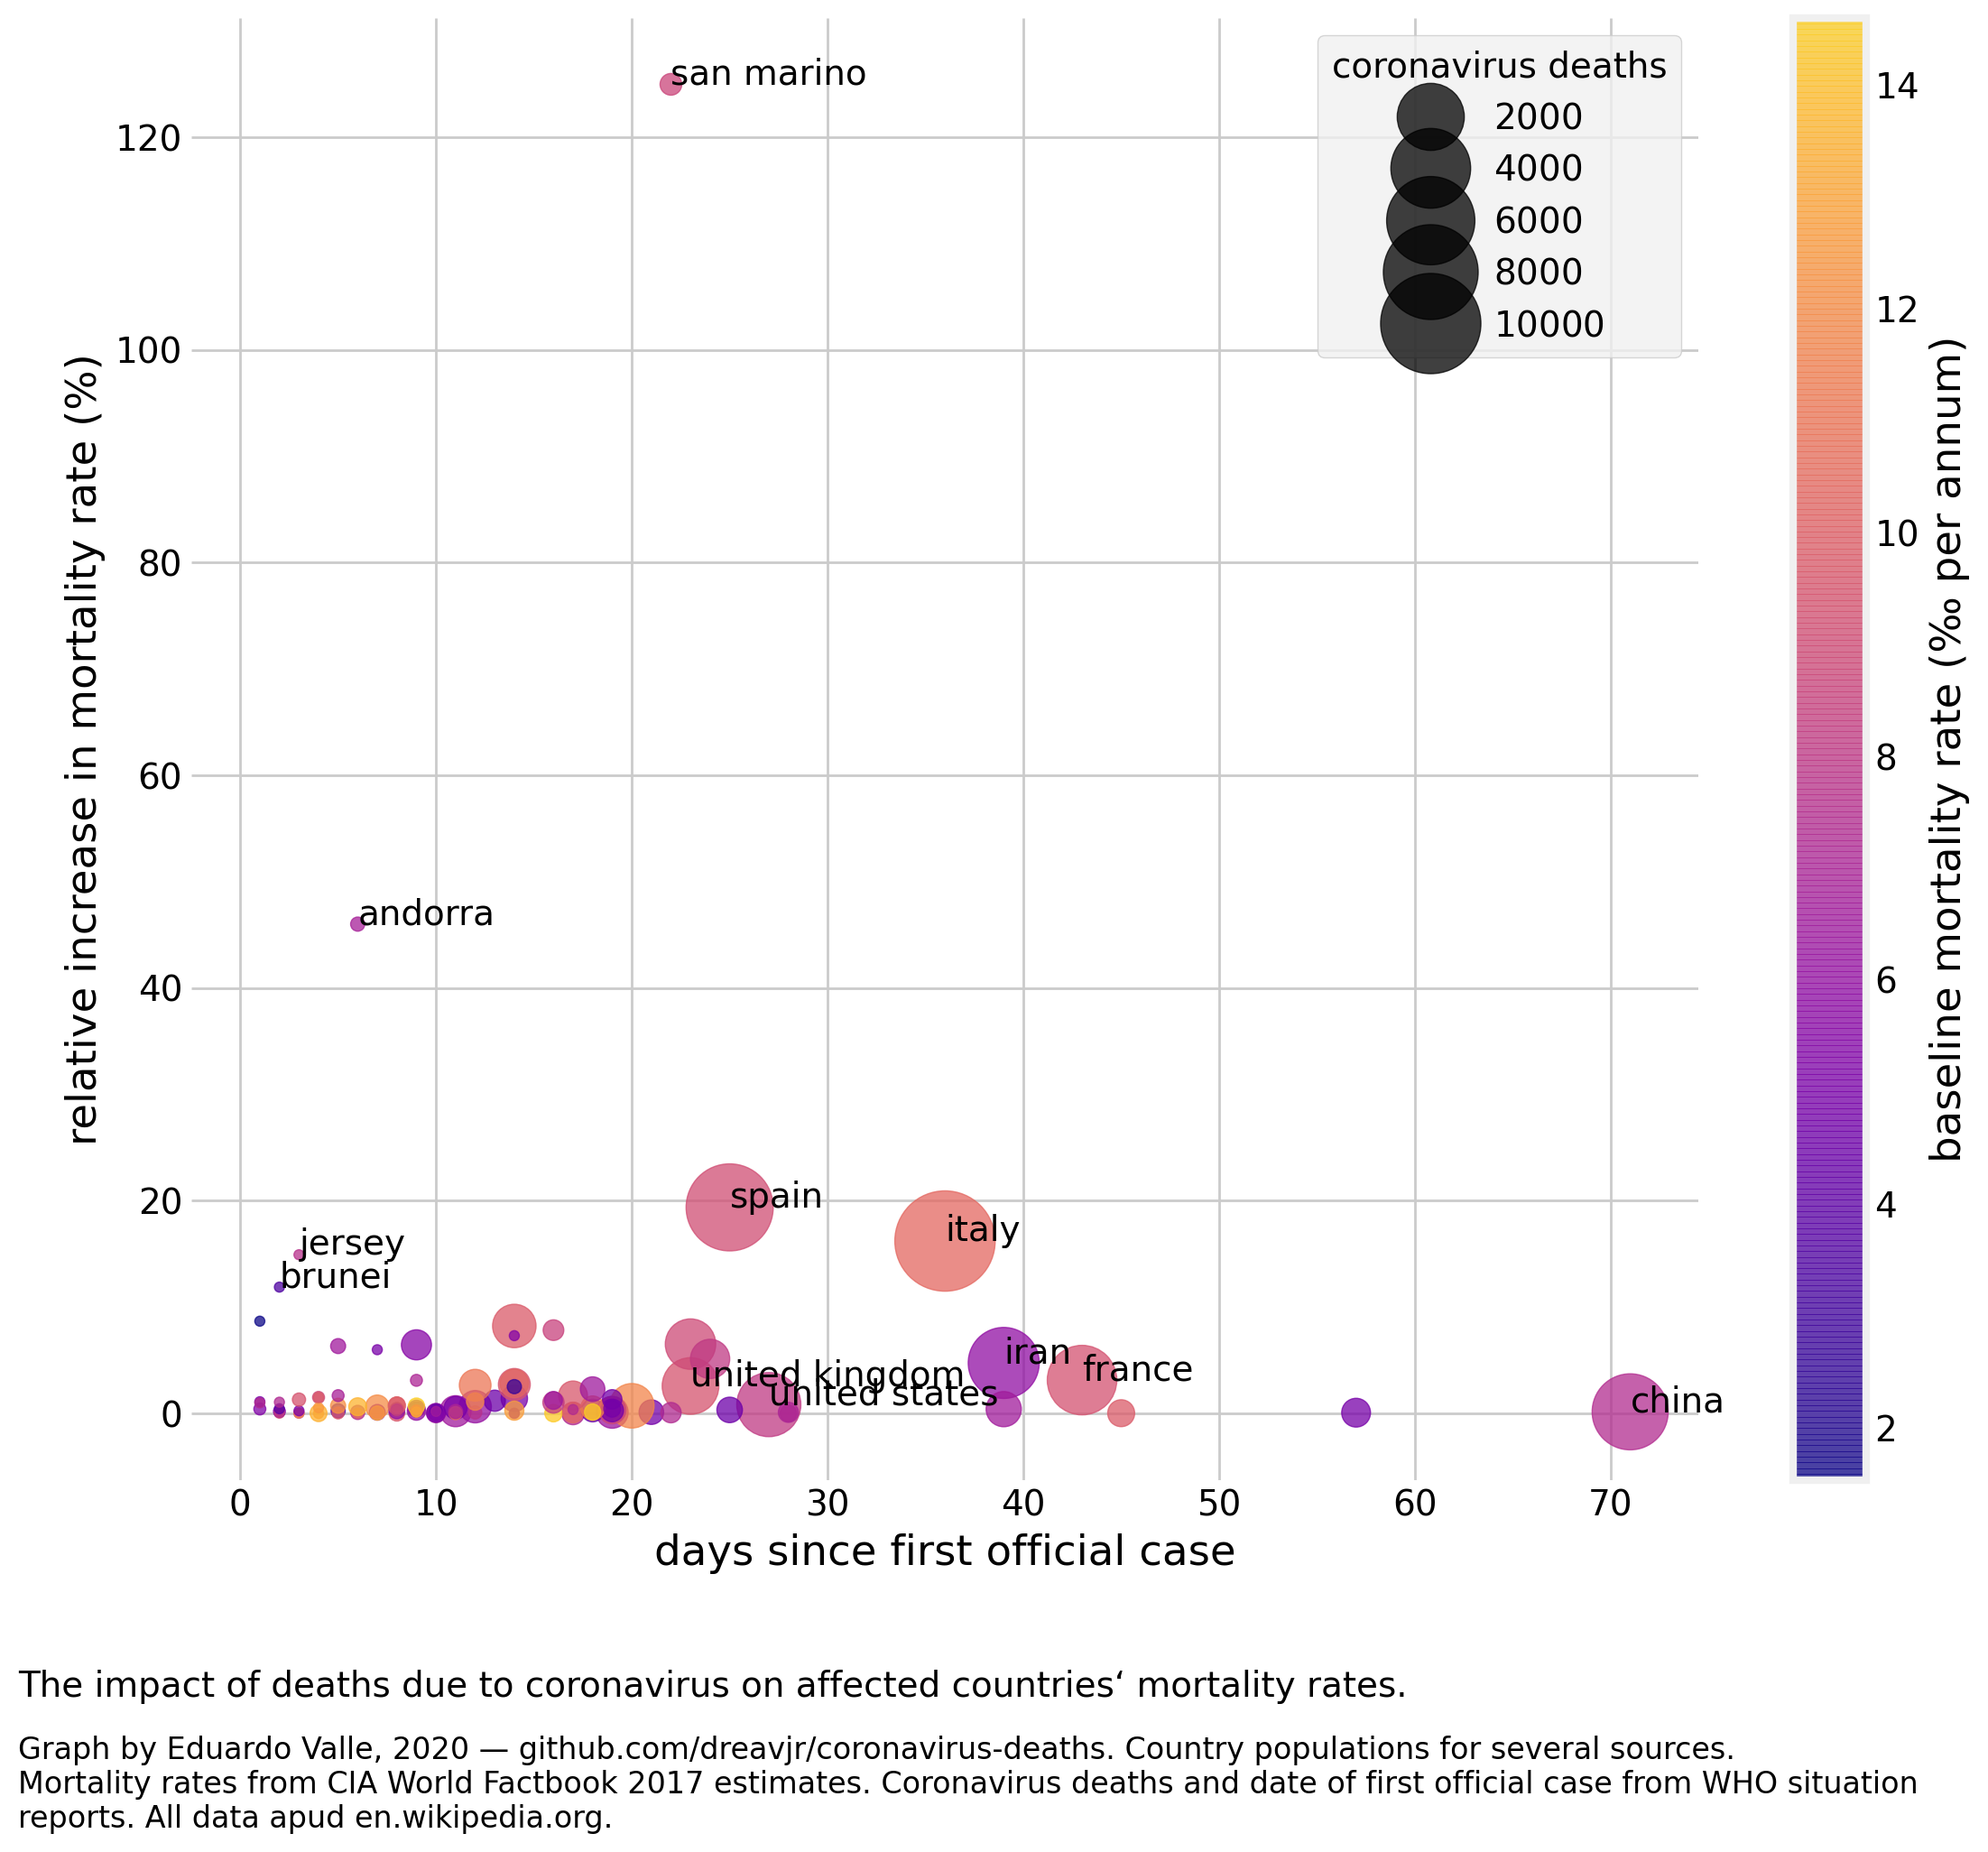

In [16]:
area_factor=16.0
surplus_rate_perc_s = surplus_rate_s * 100.
bubble_area_s = np.sqrt(deaths_s)

caption = 'The impact of deaths due to coronavirus on affected countries‘ mortality rates.'
subcaption = 'Graph by Eduardo Valle, 2020 — github.com/dreavjr/coronavirus-deaths. Country populations for several sources.\nMortality rates from CIA World Factbook 2017 estimates. Coronavirus deaths and date of first official case from WHO situation\nreports. All data apud en.wikipedia.org.'

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list('trunc({n},{a:.2f},{b:.2f})'.format(
            n=cmap.name, a=minval, b=maxval), cmap(np.linspace(minval, maxval, n)))
    return new_cmap
cmap = plt.get_cmap('plasma')
cmap_truncated = truncate_colormap(cmap, maxval=0.9)

with plt.style.context('fivethirtyeight'): 
    #plt.figure(figsize=(w, h), dpi=d)
    fig = plt.figure(figsize=(12, 10), dpi=200)
    fig.patch.set_facecolor('white')
    ax = plt.gca()
    for s in ax.spines:
        ax.spines[s].set_visible(False)
    ax.set_facecolor('white')
    sc = plt.scatter(days_since_s, surplus_rate_perc_s, s=bubble_area_s*area_factor, c=mortalities_s, cmap=cmap_truncated, alpha=0.75)
    for c,d,s,de in zip(countries_s, days_since_s, surplus_rate_perc_s, deaths_s):
        if s>10 or de>1000:
            ax.annotate(c, (d, s))
    
    ax.set_xlabel('days since first official case')
    ax.set_ylabel('relative increase in mortality rate (%)')
    cbar = plt.colorbar()
    cbar.ax.set_ylabel('baseline mortality rate (‰ per annum)')
    plt.legend(*sc.legend_elements("sizes", num=6, func=lambda x: (x/area_factor)**2), title='coronavirus deaths')
    plt.figtext(0.0, -0.05, caption, wrap=True, horizontalalignment='left', fontsize=14)
    plt.figtext(0.0, -0.12, subcaption, wrap=True, horizontalalignment='left', fontsize=12)